# Trabajo Práctico 2: Problema de Empaquetamiento
El presente trabajo busca evaluar el desarrollo y análisis de un problema NP Completo, la implementación de una solución
exacta así como una aproximada y su análisis. La primera fecha de entrega del TP será el 05/06/23, mientras que la segunda
fecha de entrega (con reducción de nota) será el 12/06/23.

## Definición del problema
Dado un conjunto de n objetos cuyos tamaños son {T1, T2, · · · , Tn}, con Ti ∈ (0, 1], se debe empaquetarlos usando la mínima
cantidad de envases de capacidad 1.

### Enunciado
1. Demostrar que el problema de empaquetamiento es NP-Completo.
2. Programar un algoritmo por Backtracking/Fuerza Bruta que busque la solución exacta del problema. Indicar la
complejidad del mismo. Realizar mediciones del tiempo de ejecución, y realizar gráficos en función de n.
3. Considerar el siguiente algoritmo: Se abre el primer envase y se empaqueta el primer objeto, luego por cada uno de los
objetos restantes se prueba si cabe en el envase actual que está abierto. Si es así, se lo agrega a dicho envase, y se sigue
con el siguiente objeto. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se
empaqueta el objeto y se prosigue con el siguiente.
Este algoritmo sirve como una aproximación para resolver el problema de empaquetamiento. Implementar dicho
algoritmo, analizar su complejidad, y analizar cuán buena aproximación es. Para esto, considerar lo siguiente: Sea I una
instancia cualquiera del problema de empaquetamiento, y z(I) una solución óptima para dicha instancia, y sea A(I) la
solución aproximada, se define A(I)/z(I) ≤ r(A) para todas las instancias posibles. Calcular r(A) para el algoritmo dado,
demostrando que la cota está bien calculada. Realizar mediciones utilizando el algoritmo exacto y la aproximación, con
el objetivo de verificar dicha relación.
4. Implementar alguna otra aproximación (u algoritmo greedy) que les parezca de interés. Comparar sus
resultados con los dados por la aproximación del punto 3. Indicar y justificar su complejidad.
Se recomienda realizar varias ejecuciones con distintos conjuntos de datos del mismo tamaño y promediar los tiempos medidos
para obtener un punto a graficar. Repetir para valores de n crecientes hasta valores que sean manejables con el hardware
donde se realiza la prueba.

1. Demostrar que el problema de empaquetamiento es NP-Completo.


Para demostrar que el problema de empaquetamiento es NP-Completo, se debe demostrar que es NP y luego reducir un problema NP-Completo a este problema.

Para demostrar que es NP, se debe demostrar que existe un algoritmo polinomial que verifica si una solución es correcta.  
En este caso, dada una lista de elementos y una lista de elementos empaquetados, para verificar que la solución es correcta hay que:  
1. Verificar que todos los elementos estén en algún paquete  
2. Verificar que la suma de los elementos de cada paquete sea menor o igual a 1  
3. Verificar que la cantidad de paquetes sea la mínima posible  

Los puntos 1 y 2 se pueden verificar en forma polinomial, pero, si uno no conoce de antemano la cantidad mínima de paquetes, el punto 3 no se puede verificar en forma polinomial (ya que habría que resolver el problema de empaquetamiento el cual estamos en proceso de demostrar que es NP-Completo).

Para verificar que un resultado es correcto, vamos a verificar que todos los items estén en algún paquete, que no haya items de más en los paquetes y que la suma de los items de cada paquete sea menor o igual a 1.  
Además, verificamos si no hay dos paquetes que puedan ser unidos en uno solo, ya que si se puede unir dos paquetes, entonces no es una solución óptima. Esto no verifica completamente que la cantidad de paquetes sea la mínima, ya que no hace una reorganización de items entre paquetes (ya que para esa verificación es necesario resolver el problema de empaquetamiento).

In [15]:
def verificacion_paquetes(items, paquetes): # n -> #items | p -> #paquetes
    # Cond1: Verifico si todos los items estan en algun paquete
    paquetes_flatten = [item for sublist in paquetes for item in sublist]

    for item in items: # n veces
        if item in paquetes_flatten:
            paquetes_flatten.remove(item) # O(n) -> Busca el item y lo remueve
        else:
            return False
    # n * O(n) = O(n^2)

    if len(paquetes_flatten) > 0: # O(1)
        return False # Hay items de más en los paquetes

    # Cond2: Verifico que ningún paquete sume más de 1
    if not all(sum(paquete) <= 1 for paquete in paquetes): # O(n) (Dado que ya se verificó que 
        return False            # los paquetes en conjunto tienen a todos los items, hacer todas
                                # las sumas tiene en cuenta a todos los items una vez)
    
    # Cond3: Verifico que ningún paquete pueda agregarse a otro
    for paquete in paquetes: # p veces
        for otro_paquete in paquetes: # O(n) (Dado que este ciclo recorre todos los items una vez
            if paquete != otro_paquete:     # y por cada item hace operaciones constantes)
                if sum(paquete + otro_paquete) <= 1: 
                    return False                
    # p * O(n) = O(p*n)

    return True
# Complejidad: O(n^2 + p*n)
# Dado que n >= p, la complejidad es O(n^2)

# Ejemplo 1 -> Correcto
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
paquetes = [[0.5, 0.4, 0.1], [0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4]]
print("Ejemplo 1 -> ", verificacion_paquetes(items, paquetes))

# Ejemplo 2 -> Incorrecto (falta el 0.1)
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
paquetes = [[0.5, 0.4], [0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4]]
print("Ejemplo 2 -> ", verificacion_paquetes(items, paquetes))

# Ejemplo 3 -> Incorrecto (sobra el 0.1)
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
paquetes = [[0.5, 0.4, 0.1], [0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4], [0.1]]
print("Ejemplo 3 -> ", verificacion_paquetes(items, paquetes))

# Ejemplo 4 -> Incorrecto (Un paquete suma más de 1)
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
paquetes = [[0.6, 0.4, 0.1], [0.8, 0.2], [0.7, 0.2, 0.1], [0.5, 0.4]]
print("Ejemplo 4 -> ", verificacion_paquetes(items, paquetes))

# Ejemplo 5 -> Incorrecto (Un paquete puede agregarse a otro)
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
paquetes = [[0.5, 0.4, 0.1], [0.8, 0.2], [0.7, 0.2, 0.1], [0.6], [0.4]]
print("Ejemplo 5 -> ", verificacion_paquetes(items, paquetes))


Ejemplo 1 ->  True
Ejemplo 2 ->  False
Ejemplo 3 ->  False
Ejemplo 4 ->  False
Ejemplo 5 ->  False


Dado que esta verificación es O(n²), siendo n la cantidad de items, entonces la verificación del problema de empaquetamiento es polinomial y por lo tanto el problema de empaquetamiento es NP.

Ahora resta demostrar que el problema de empaquetamiento es NP-Completo. Para esto, se va a reducir un problema NP-Completo al problema de empaquetamiento.
El problema que se va a reducir al problema de empaquetamiento es el problema de Subset Sum, el cual es NP-Completo.

**Problema de Subset Sum**  
Dada una lista de enteros L y un entero S, se debe determinar si existe un subconjunto de L cuya suma sea S.

**Reducción de Subset Sum a Empaquetamiento**  
Dada una instancia del problema de Subset Sum, se resuelve con el algoritmo de empaquetamiento de la siguiente forma:
1. Se toma el positivo S y se divide a toda la lista L por S, obteniendo una lista L' de elementos entre 0 y 1.
2. Se resuelve el problema de empaquetamiento con la lista L' y se obtiene una lista de paquetes P.
3. Se toma el positivo S y se multiplica a toda la lista de paquetes P por S, obteniendo una lista de paquetes P' de capacidad S.
4. Iteramos a lo largo de la lista de paquetes P' y si hay algún paquete que tenga una suma de elementos igual a S, entonces la solución es verdadera, sino es falsa.

> Dado que el problema de empaquetamiento busca devolver la minima cantidad de paquetes, si es posible armar paquetes que sumen exactamente 1 lo va a hacer dado que contribuirá a tener menos paquetes. De esta forma, si el problema de empaquetamiento devuelve algún paquete que sume exactamente 1, al multiplicarlo por S, se obtendrá un paquete que sume exactamente S.


2. Programar un algoritmo por Backtracking/Fuerza Bruta que busque la solución exacta del problema. Indicar la complejidad del mismo. Realizar mediciones del tiempo de ejecución, y realizar gráficos en función de n.

In [16]:
# to use deepcopy
from copy import deepcopy
from math import inf

def _empaquetar_back(items, paquetes, tabs=0, len_min=inf):
    if len(items) == 0:
        # print("\t"*tabs, "items:", items)
        # print("\t"*tabs, "paquetes:", paquetes)
        return paquetes
    
    # tomamos el primer item
    item = items.pop(0)

    # agrego un nuevo paquete
    if paquetes == []:
        paquetes.append([item])
        return _empaquetar_back(items.copy(), deepcopy(paquetes), tabs+1)

    # hay que empaquetar el item
    # puede ser en un paquete existente
    # o en un paquete nuevo
    opciones = []
    # print("\t"*tabs, "item:", item)
    # print("\t"*tabs, "paquetes:", paquetes)
    for i in range(len(paquetes)):
        if sum(paquetes[i]) + item <= 1:
            paquetes_copia = deepcopy(paquetes)
            paquetes_copia[i].append(item)
            opcion = _empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min)
            if len(opcion) < len_min:
               len_min = len(opcion)
               opciones = [opcion]

    
    if len(opciones) + 1 <= len_min:
        paquetes_copia = deepcopy(paquetes)
        paquetes_copia.append([item])
        opciones.append(_empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min))
                
    # print("\t"*tabs, "opciones:", opciones)
    min = opciones[0]

    for opcion in opciones:
        if len(opcion) < len(min):
            min = opcion

    # print("\t"*tabs, "min:", min)

    return min
            
def empaquetar_back(items):
    paquetes = []
    return _empaquetar_back(items.copy(), paquetes)

In [17]:
items = [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_back(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_back(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.4, 0.5, 0.1], [0.8, 0.2], [0.7, 0.1, 0.2], [0.6, 0.4]]


Aprovechamos la resolución del problema de empaquetamiento para resolver el problema de subset sum.

In [18]:
def _subset_sum(lista, n):
    items_n = [round(i/n, 3) for i in lista]
    paquetes = empaquetar_back(items_n)
    paquetes_n = []
    for paquete in paquetes:
        paquetes_n.append([round(i*n) for i in paquete])
    for paquete in paquetes_n:
        if sum(paquete) == n:
            return paquete
    return None

def subset_sum(lista, n):
    return _subset_sum(lista, n) != None

In [19]:
items_subset = [4, 8, 5, 1, 7, 6, 1, 4, 2, 2]
print("[4, 8, 5, 1, 7, 6, 1, 4, 2, 2], n = 9 -> ", subset_sum(items_subset, 9))

items_subset = [4, 8, 7, 6, 4]
print("[4, 8, 7, 6, 4], n = 9 -> ", subset_sum(items_subset, 9))
 
items_subset = [4, 7, 6, 4, 1]
print("[4, 7, 6, 4, 1], n = 9 -> ", subset_sum(items_subset, 9))

items_subset = [4, 7, 6, 4, 1]
print("[4, 7, 6, 4, 1], n = 13 -> ", subset_sum(items_subset, 13))

[4, 8, 5, 1, 7, 6, 1, 4, 2, 2], n = 9 ->  True
[4, 8, 7, 6, 4], n = 9 ->  False
[4, 7, 6, 4, 1], n = 9 ->  True
[4, 7, 6, 4, 1], n = 13 ->  False


**Complejidad:**  
La complejidad de este algoritmo es O(2^n) siendo n la cantidad de items, ya que se realizan todas las combinaciones posibles de items hasta encontrar la óptima. Aunque realizamos podas en el algoritmo (para que no sea una resolución por fuerza bruta), lo cual reduce bastante los tiempos de ejecución, estos cortes de rama no afectan a la complejidad algoritmica en sí y se puede notar al ver lo rápido que escala en tiempo ya desde pocos items.


Creamos una función que genere sets para hacer las mediciones.

In [20]:
from random import uniform

def generador_items(n):
    return [round(uniform(0.01, 1.00), 2) for _ in range(n)]

In [21]:
import time

tiempos = {}
for i in range(0, 15, 1):
    items = generador_items(i)
    start = time.time() # hacer promedio de varias corridas
    paquetes = empaquetar_back(items)
    end = time.time()
    tiempos[i] = end - start
    print(f"termine para {i} elementos en {end-start} segundos")

termine para 0 elementos en 0.0 segundos
termine para 1 elementos en 0.0 segundos
termine para 2 elementos en 0.0 segundos
termine para 3 elementos en 0.0 segundos
termine para 4 elementos en 0.0 segundos
termine para 5 elementos en 0.0 segundos
termine para 6 elementos en 0.0009970664978027344 segundos
termine para 7 elementos en 0.0 segundos
termine para 8 elementos en 0.0 segundos
termine para 9 elementos en 0.01799774169921875 segundos
termine para 10 elementos en 0.09099817276000977 segundos
termine para 11 elementos en 0.03999948501586914 segundos
termine para 12 elementos en 0.026998043060302734 segundos
termine para 13 elementos en 0.23899388313293457 segundos
termine para 14 elementos en 0.022998332977294922 segundos


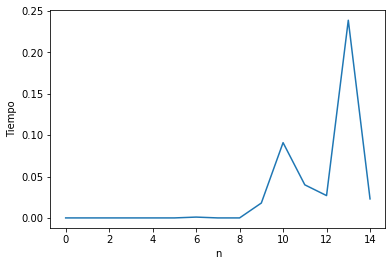

In [22]:
from matplotlib import pyplot as plt

plt.plot(tiempos.keys(), tiempos.values())
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.show()

3. Considerar el siguiente algoritmo: Se abre el primer envase y se empaqueta el primer objeto, luego por cada uno de los
objetos restantes se prueba si cabe en el envase actual que está abierto. Si es así, se lo agrega a dicho envase, y se sigue
con el siguiente objeto. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se
empaqueta el objeto y se prosigue con el siguiente.
Este algoritmo sirve como una aproximación para resolver el problema de empaquetamiento. Implementar dicho
algoritmo, analizar su complejidad, y analizar cuán buena aproximación es. Para esto, considerar lo siguiente: Sea I una
instancia cualquiera del problema de empaquetamiento, y z(I) una solución óptima para dicha instancia, y sea A(I) la
solución aproximada, se define A(I)/z(I) ≤ r(A) para todas las instancias posibles. Calcular r(A) para el algoritmo dado,
demostrando que la cota está bien calculada. Realizar mediciones utilizando el algoritmo exacto y la aproximación, con
el objetivo de verificar dicha relación.

Algoritmo de aproximación:  
1. Se abre el primer envase y se empaqueta el primer objeto.  
2. Por cada uno de los objetos restantes se prueba si cabe en el envase actual que está abierto.  
a. Si es así, se lo agrega a dicho envase, y se sigue con el siguiente objeto.  
b. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se empaqueta el objeto y se prosigue con el siguiente.  


In [23]:
def empaquetar_aprox(items):
    paquetes = []
    paquete_actual = []
    for item in items:
        if round(sum(paquete_actual) + item, 4) <= 1:
            paquete_actual.append(item)
        else:
            paquetes.append(paquete_actual)
            paquete_actual = [item]
    paquetes.append(paquete_actual)
    return paquetes

In [24]:
items = [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_aprox(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_aprox(items))

[[0.5, 0.4], [0.3, 0.2, 0.1]]
[[0.4], [0.8], [0.5, 0.1], [0.7], [0.6, 0.1], [0.4, 0.2, 0.2]]


**Complejidad:**  
La complejidad de este algoritmo es O(n), ya que recorre todos los items y asigna cada uno a un envase sin hacer (lo cual es O(1)).

**Análisis de la aproximación:**  
Analizando los paquetes, se puede ver que:  
- Dos paquetes consecutivos no pueden sumar <= 1 ya que sino estarían en el mismo paquete  
- Debido al punto anterior, no puede haber dos paquetes consecutivos en donde cada uno sume <= 0.5  

De esta forma, en el peor caso, cada paquete puede sumar 0.5 + ε (siendo ε un número muy chico), y si la forma óptima para armar los paquetes es que cada paquete sume 1, entonces la aproximación va a repartir los items en el doble de paquetes que la solución óptima. Por lo tanto, la cota de la aproximación es 2.

In [25]:
def calcular_tiempo(items, funcion):
    start = time.time()
    funcion(items)
    end = time.time()
    return end - start

In [26]:
import time

tiempos = {}
for i in range(1, 10000, 100):
    todos = []
    for _ in range(100):
        items = generador_items(i)
        todos.append(calcular_tiempo(items, empaquetar_aprox))
    tiempos[i] = sum(todos) / len(todos)

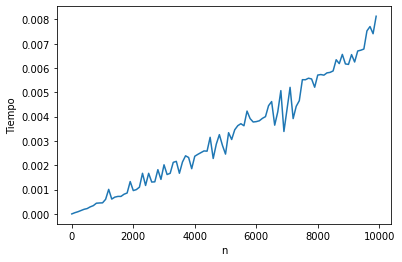

In [27]:
from matplotlib import pyplot as plt

plt.plot(tiempos.keys(), tiempos.values())
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.show()

4. Implementar alguna otra aproximación (u algoritmo greedy) que les parezca de interés. Comparar sus
resultados con los dados por la aproximación del punto 3. Indicar y justificar su complejidad.
Se recomienda realizar varias ejecuciones con distintos conjuntos de datos del mismo tamaño y promediar los tiempos medidos
para obtener un punto a graficar. Repetir para valores de n crecientes hasta valores que sean manejables con el hardware
donde se realiza la prueba.

In [28]:
def empaquetar_greedy(items):
    #ordenamos los items de mayor a menor
    items.sort(reverse=True)
    paquetes = []

    for item in items:
        
        # si no hay paquetes creo el primero
        if paquetes == []:
            paquetes.append([item])
            continue

        # itero sobre los paquetes
        agregado = False
        for i in range(len(paquetes)):
            # si el item entra en el paquete
            if round(sum(paquetes[i]) + item, 4) <= 1:
                paquetes[i].append(item)
                agregado = True
                break

        # si no entra en ningun paquete
        if not agregado:
            paquetes.append([item])
            
    return paquetes

Complejidad:
La complejidad de este algoritmo es O(n²) ya que recorre todos los items y por cada uno recorre todos los paquetes para ver si entra en alguno (lo cual es O(n)) y si no lo encuentra lo crea, cada operación que se hace es de tiempo constante.

In [29]:
items = [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_greedy(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_greedy(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4], [0.5, 0.4, 0.1]]


In [30]:
tiempos_aprox = {}
tiempos_greedy = {}

for i in range(10, 1000, 10):
    todos_aprox = []
    todos_greedy = []
    for _ in range(50):
        items = generador_items(i)
        todos_aprox.append(calcular_tiempo(items, empaquetar_aprox))
        todos_greedy.append(calcular_tiempo(items, empaquetar_greedy))
    tiempos_aprox[i] = sum(todos_aprox) / len(todos_aprox)
    tiempos_greedy[i] = sum(todos_greedy) / len(todos_greedy)

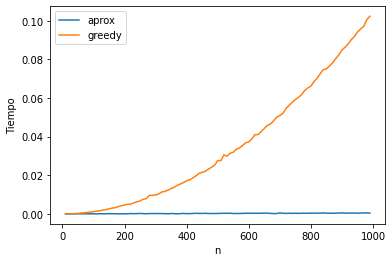

In [31]:
plt.plot(tiempos_aprox.keys(), tiempos_aprox.values(), label="aprox")
plt.plot(tiempos_greedy.keys(), tiempos_greedy.values(), label="greedy")
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.legend()
plt.show()

In [32]:
items1 = generador_items(5)
items2 = generador_items(10)
items3 = generador_items(15)

back1 = empaquetar_back(items1)
back2 = empaquetar_back(items2)
back3 = empaquetar_back(items3)

aprox1 = empaquetar_aprox(items1)
aprox2 = empaquetar_aprox(items2)
aprox3 = empaquetar_aprox(items3)

greedy1 = empaquetar_greedy(items1)
greedy2 = empaquetar_greedy(items2)
greedy3 = empaquetar_greedy(items3)

In [33]:
print("Para 5 items:")
print(f"Backtracking -> {len(back1)} paquetes -> {back1}")
print(f"Sumas paquetes back -> {[sum(p) for p in back1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back1])}")
print(f"Aproximacion -> {len(aprox1)} paquetes -> {aprox1}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox1])}")
print(f"Greedy -> {len(greedy1)} paquetes -> {greedy1}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy1])}\n")

print("Para 10 items:")
print(f"Backtracking -> {len(back2)} paquetes -> {back2}")
print(f"sumas paquetes back -> {[sum(p) for p in back2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back2])}")
print(f"Aproximacion -> {len(aprox2)} paquetes -> {aprox2}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox2])}")
print(f"Greedy -> {len(greedy2)} paquetes -> {greedy2}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy2])}\n")

print("Para 15 items:")
print(f"Backtracking -> {len(back3)} paquetes -> {back3}")
print(f"sumas paquetes back -> {[sum(p) for p in back3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back3])}")
print(f"Aproximacion -> {len(aprox3)} paquetes -> {aprox3}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox3])}")
print(f"Greedy -> {len(greedy3)} paquetes -> {greedy3}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy3])}\n")

Para 5 items:
Backtracking -> 3 paquetes -> [[0.24, 0.22, 0.52], [0.9], [0.44]]
Sumas paquetes back -> [0.98, 0.9, 0.44]
Algun paquete tiene un valor mayor que 1 -> [False, False, False]
Cantidad de elementos totales -> 5
Aproximacion -> 3 paquetes -> [[0.24, 0.22, 0.52], [0.9], [0.44]]
Sumas paquetes aprox -> [0.98, 0.9, 0.44]
Algun paquete tiene un valor mayor que 1 -> [False, False, False]
Cantidad de elementos totales -> 5
Greedy -> 3 paquetes -> [[0.9], [0.52, 0.44], [0.24, 0.22]]
Sumas paquetes greedy -> [0.9, 0.96, 0.45999999999999996]
Algun paquete tiene un valor mayor que 1 -> [False, False, False]
Cantidad de elementos totales -> 5

Para 10 items:
Backtracking -> 7 paquetes -> [[0.82], [0.4, 0.55], [0.62, 0.23], [0.66], [0.84], [0.4, 0.47], [0.72]]
sumas paquetes back -> [0.82, 0.9500000000000001, 0.85, 0.66, 0.84, 0.87, 0.72]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False, False, False]
Cantidad de elementos totales -> 10
Aproximacion -> 9 paq

In [34]:
with open("comparativa.txt", "w") as f:
    for i in range(1, 50, 10):
        items = generador_items(i)
        aprox = empaquetar_aprox(items)
        greedy = empaquetar_greedy(items)
        f.write(f"Para {i} items:\n")
        f.write(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}\n")
        f.write(f"Greedy -> {len(greedy)} paquetes -> {greedy}\n\n")

In [35]:
with open("comparativa2.txt", "w") as f:
    for i in range(1, 2500, 50):
        items = generador_items(i)
        aprox = empaquetar_aprox(items)
        greedy = empaquetar_greedy(items)
        f.write(f"Para {i} items:\n")
        f.write(f"Aproximacion -> {len(aprox)} paquetes\n")
        f.write(f"Greedy -> {len(greedy)} paquetes\n\n")
        f.write(f"Diferecia -> {len(aprox) - len(greedy)}\n\n")

In [36]:
items = [0.69, 0.22, 0.08, 0.62, 0.18, 0.18, 0.59, 0.4, 0.49, 0.49]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")


Para 10 items:
Backtracking -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes back -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes aprox -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10



In [37]:
items = [0.08, 0.22, 0.49, 0.18, 0.4, 0.59, 0.49, 0.69, 0.18, 0.62]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algún paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")

Para 10 items:
Backtracking -> 4 paquetes -> [[0.08, 0.22, 0.69], [0.49, 0.49], [0.18, 0.18, 0.62], [0.4, 0.59]]
Sumas paquetes back -> [0.99, 0.98, 0.98, 0.99]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 5 paquetes -> [[0.08, 0.22, 0.49, 0.18], [0.4, 0.59], [0.49], [0.69, 0.18], [0.62]]
Sumas paquetes aprox -> [0.97, 0.99, 0.49, 0.8699999999999999, 0.62]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algún paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10



Dados los 3 algoritmos:  
- Backtracking -> O(2^n)  
- Aproximación cátedra -> O(n)  
- Aproximación greedy -> O(n^2)  

Para elegir entre los algoritmos vamos a tener en cuenta el tiempo de ejecución y la optimalidad de la solución.  

Respecto al tiempo de ejecución, el algoritmo de backtracking es el que peor tiempo de ejecución tiene, llegando a tardar un tiempo demasiado largo (horas) para una cantidad de items relativamente pequeña. Por otro lado, los algoritmos de aproximación tardan un tiempo mucho menor, siendo el algoritmo de aproximación de la cátedra el que menos tarda y el algoritmo greedy el que más tarda, pero esperando tiempos muy pequeños para inputs con miles de elementos (para 1000 elementos tarda 0.1 segundos).  

Respecto a la optimalidad, el algoritmo de backtraking es óptimo por definicion ya que ve todas las alternativas posibles y elige la que cumple la condicion de ser óptima. Respecto a las aproximaciones, ambas suelen dan resultados diferentes al optimo pero el algoritmo greedy da mejores soluciones ya que su resultado no depende del orden en el que le pasen los elementos, lo que permite que las mismas sean bastante cercanas al óptimo.

Por lo tanto, elegimos el algoritmo de aproximación greedy ya que da resultados muy cercanos al óptimo sin alejarse mucho de los tiempos de ejecución de la aproximación de la cátedra.